<a href="https://colab.research.google.com/github/narita1980/note.com-hashtag/blob/main/sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 人気タグからタグ名とアクセス数を調査する
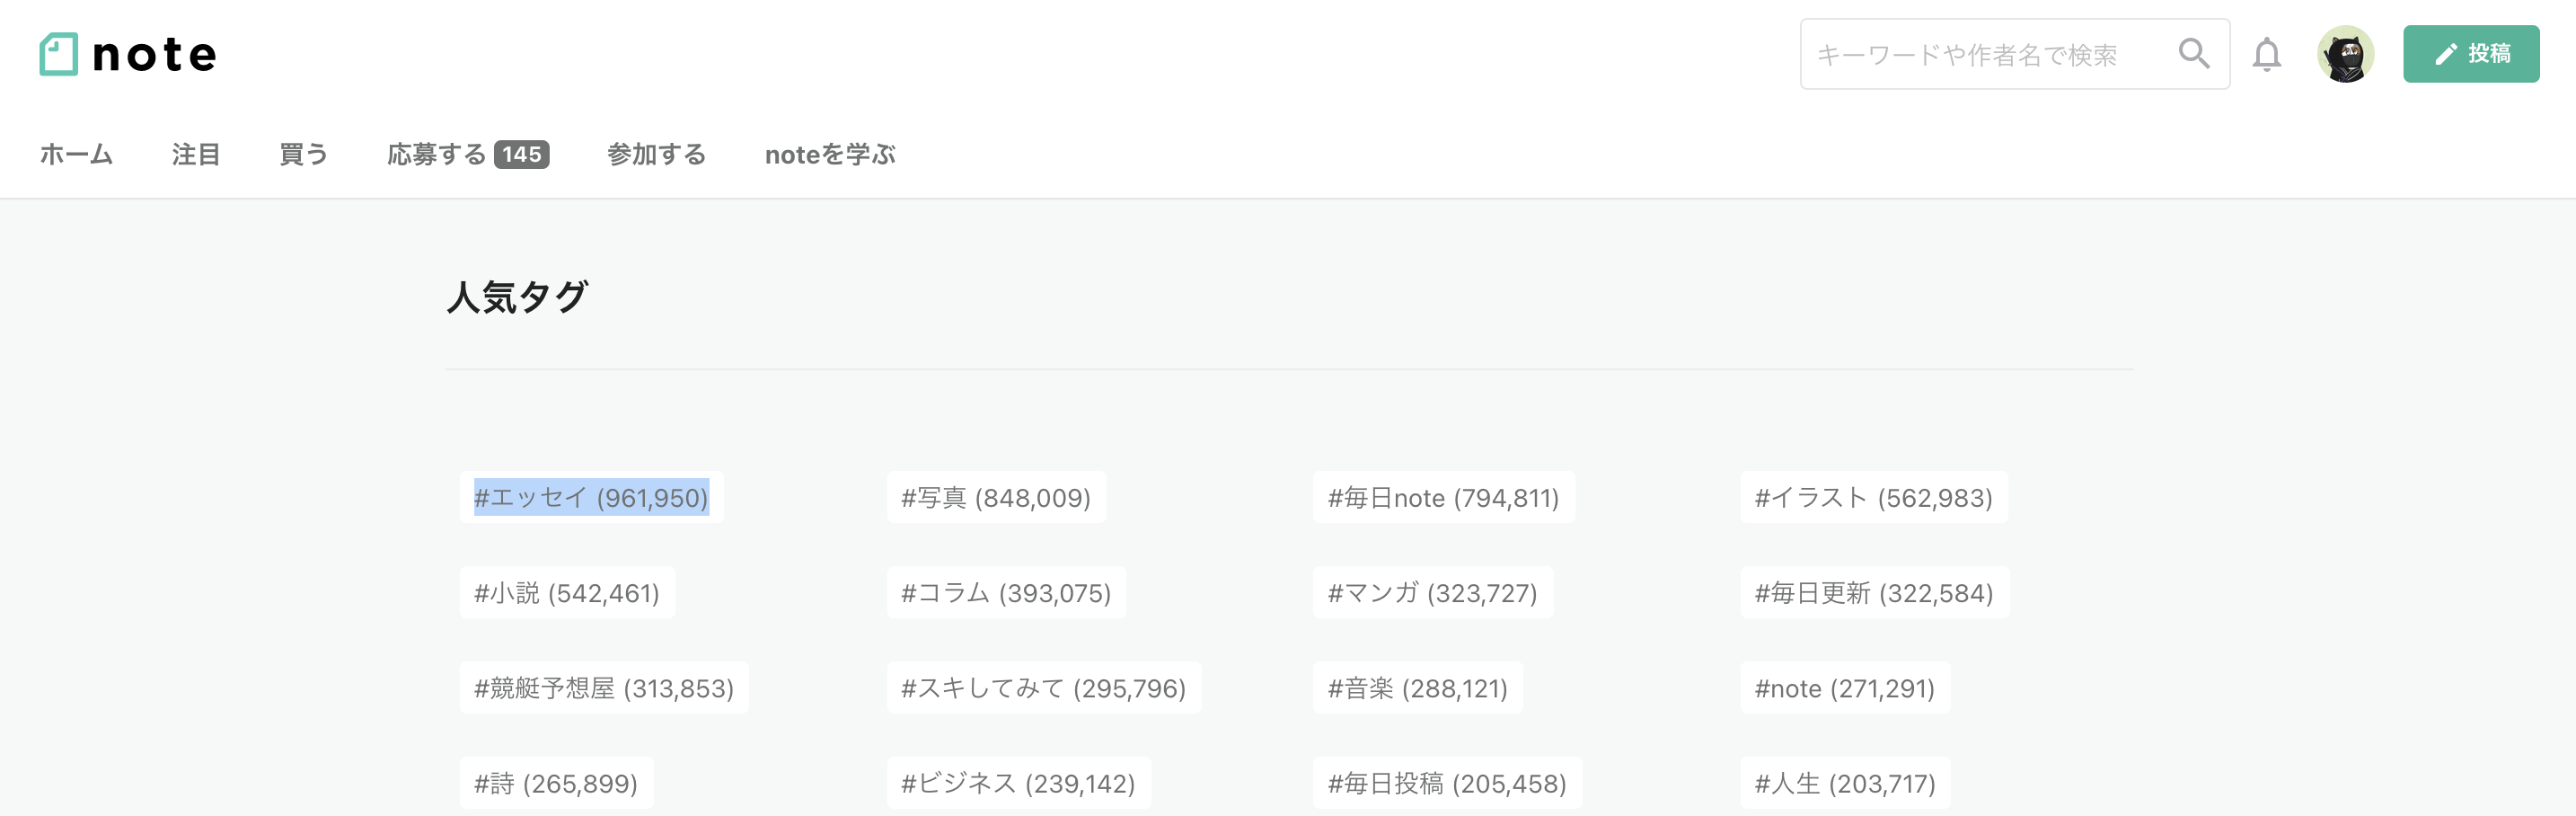

In [ ]:
from typing import Dict, List, Optional
from bs4 import BeautifulSoup
import requests

def get_hashtags(page: int = 1) -> Dict[str, int]:
  url = "https://note.com/hashtag/?page=" + str(page) 
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')
  result = soup.select('a.a-link.p-hashtag__link.fn')

  dic = {}
  for i in result:
    p = i.text.strip().rfind('(')
    number = int(i.text.strip()[p:].replace('(', '').replace(')', '').replace(',', ''))
    hashtag = i.text.strip()[:p].strip()
    dic[hashtag] = number

  return dic

In [ ]:
import tqdm

# 終わりの判定が難しいので一旦page=100まで言ったら迷惑かけないよう終わる
dic = {}
for i in tqdm.tqdm(range(1, 100)):
  new_dic = get_hashtags(i)
  key = list(new_dic.keys())[0]

  # 取得したハッシュタグの中に既に取得済みのハッシュタグを見つけたら終える
  # 現時点でこの方法でしか終端を確認できない
  if key in dic:
    break;

  dic.update(new_dic)

 20%|██        | 20/99 [00:39<02:35,  1.96s/it]


In [ ]:
import pandas as pd
df = pd.DataFrame(list(dic.items()),columns=['hashtag', 'number'])
df.head()
df.describe()

,number
count,2000.000000
mean,18336.626000
std,47002.087545
min,4463.000000
25%,5821.750000
50%,8485.500000
75%,14864.250000
max,965011.000000


In [ ]:
df.to_csv('result.csv')